<a href="https://colab.research.google.com/github/Ayman-queen/data-science-internship-tasks/blob/main/Task3_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Accuracy: 0.5

✅ Confusion Matrix:
 [[2 3]
 [0 1]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.25      1.00      0.40         1

    accuracy                           0.50         6
   macro avg       0.62      0.70      0.49         6
weighted avg       0.88      0.50      0.54         6



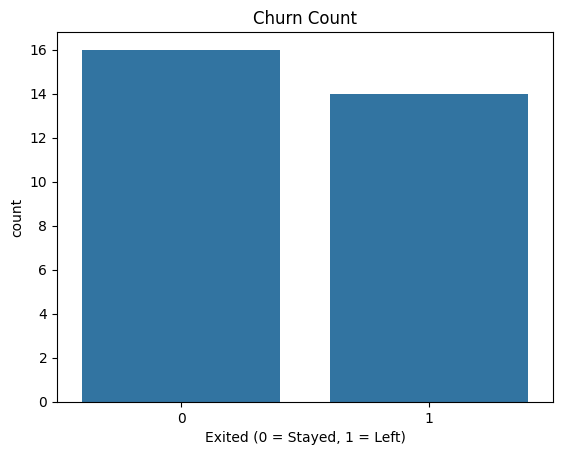

In [2]:
# ✅ Task 3: Customer Churn Prediction – Improved Sample Data (30 rows)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Create sample dataset (30 rows, mix of 0 & 1 churns)
data = {
    'credit_score': [650, 700, 620, 720, 690, 600, 680, 710, 590, 640,
                     660, 680, 710, 690, 630, 700, 675, 695, 640, 615,
                     730, 665, 680, 645, 710, 620, 690, 725, 660, 695],
    'geography': ['France', 'Spain', 'Germany', 'France', 'Spain', 'Germany', 'France', 'Germany', 'Spain', 'France',
                  'France', 'Germany', 'Spain', 'France', 'Spain', 'Germany', 'France', 'Spain', 'Germany', 'France',
                  'Germany', 'Spain', 'France', 'Germany', 'France', 'Spain', 'Germany', 'France', 'Spain', 'Germany'],
    'gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
               'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female',
               'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'age': [40, 42, 35, 30, 45, 50, 38, 29, 48, 33,
            41, 39, 37, 36, 44, 43, 34, 32, 31, 46,
            50, 47, 36, 38, 35, 45, 42, 33, 31, 39],
    'tenure': [3, 4, 2, 6, 5, 3, 4, 1, 6, 2,
               4, 2, 1, 5, 3, 6, 3, 2, 4, 3,
               2, 4, 6, 1, 3, 2, 1, 5, 4, 3],
    'balance': [10000, 15000, 20000, 12000, 18000, 16000, 17000, 14000, 19000, 11000,
                18000, 19000, 20000, 14000, 16000, 13000, 15000, 18000, 11000, 17000,
                10000, 13000, 12000, 19000, 15000, 14000, 11000, 16000, 17000, 12500],
    'num_of_products': [1,2,1,1,2,1,2,1,1,2,
                        1,1,2,2,1,1,1,2,1,1,
                        2,1,2,1,1,1,2,2,1,1],
    'has_cr_card': [1,1,0,1,0,1,0,1,0,1,
                    1,0,1,0,1,0,1,0,1,1,
                    0,1,1,0,1,0,1,0,1,1],
    'is_active_member': [1,0,1,1,0,0,1,0,1,0,
                         1,1,0,1,1,1,0,1,0,1,
                         0,1,1,1,0,0,1,1,0,1],
    'estimated_salary': [50000,60000,55000,62000,58000,57000,54000,63000,52000,51000,
                         59000,61000,60000,53000,56000,58000,57000,50000,52000,63000,
                         54000,58000,60000,55000,59000,62000,61000,54000,57000,56000],
    'exited': [0,1,0,0,1,1,0,0,1,0,
               0,1,0,1,1,0,0,0,1,1,
               0,0,1,0,1,0,1,0,1,1]
}

df = pd.DataFrame(data)

# Step 2: Encode Categorical Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Male = 1, Female = 0
df = pd.get_dummies(df, columns=['geography'], drop_first=True)

# Step 3: Split X and y
X = df.drop(columns=['exited'])
y = df['exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 5: Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot Exited
import matplotlib.pyplot as plt
sns.countplot(x='exited', data=df)
plt.title('Churn Count')
plt.xlabel('Exited (0 = Stayed, 1 = Left)')
plt.show()